# Question 1

### Import libaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Definition of loss function and gradient calculation function

In [3]:
# (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    J = (1/(2*m)) * np.sum(np.square(X.dot(theta) - y))
    return J

### Implementing variants of the Gradient Descent algorithm

#### Batch Gradient Descent

In [4]:
# Batch Gradient Descent
def batch_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Calculate gradients
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        # Update parameters
        theta = theta - alpha * gradient
        # Save cost value at each step
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

#### Stochastic Gradient Descent (SGD)

In [5]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Shuffle data
        for j in range(m):
            rand_index = np.random.randint(m)
            X_i = X[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]
            # Calculate gradient for each sample
            gradient = X_i.T.dot(X_i.dot(theta) - y_i)
            # Update parameter
            theta = theta - alpha * gradient
        # Save cost value after each loop
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


#### Mini-batch Gradient Descent

In [6]:
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, y, theta, alpha, iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Shuffle data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            # Calculate gradient for mini-batch
            gradient = (1/batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            # Update parameter
            theta = theta - alpha * gradient

        # Save cost value after each loop
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


#### Momentum

In [7]:
# Momentum Gradient Descent
def momentum_gradient_descent(X, y, theta, alpha, beta, iterations):
    m = len(y)
    v = np.zeros_like(theta)  # Velocity
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Calculate gradient
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        # Update velocity
        v = beta * v + (1 - beta) * gradient
        # Update parameter
        theta = theta - alpha * v
        # Save cost value after each loop
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


#### RMSprop

In [8]:
# RMSprop Gradient Descent
def rmsprop_gradient_descent(X, y, theta, alpha, beta, epsilon, iterations):
    m = len(y)
    cache = np.zeros_like(theta)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Calculated gradient
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        # Update cache
        cache = beta * cache + (1 - beta) * gradient**2
        # Update parameter
        theta = theta - alpha * gradient / (np.sqrt(cache) + epsilon)
        # Save cost value after each loop
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


#### Adam

In [9]:
# Adam Gradient Descent
def adam_gradient_descent(X, y, theta, alpha, beta1, beta2, epsilon, iterations):
    m = len(y)
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Calculate gradient
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)

        # Update m_t and v_t
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * gradient**2

        # Bias correction
        m_t_hat = m_t / (1 - beta1**(i + 1))
        v_t_hat = v_t / (1 - beta2**(i + 1))

        # Update parameter
        theta = theta - alpha * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

        # Save cost value after each loop
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


### Example

#### Example with random data

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Create random data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random data (100 samples, 1 feature)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with noise

# Add column 1 for bias term (X0 = 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]


In [12]:
# Initialize random parameter (theta)
theta_init = np.random.randn(2, 1)

# Algorithm parameters
alpha = 0.1
iterations = 1000
batch_size = 32
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Applying algorithms
theta_batch, cost_batch = batch_gradient_descent(X_b, y, theta_init, alpha, iterations)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_b, y, theta_init, alpha, iterations)
theta_mini_batch, cost_mini_batch = mini_batch_gradient_descent(X_b, y, theta_init, alpha, iterations, batch_size)
theta_momentum, cost_momentum = momentum_gradient_descent(X_b, y, theta_init, alpha, beta1, iterations)
theta_rmsprop, cost_rmsprop = rmsprop_gradient_descent(X_b, y, theta_init, alpha, beta2, epsilon, iterations)
theta_adam, cost_adam = adam_gradient_descent(X_b, y, theta_init, alpha, beta1, beta2, epsilon, iterations)


<Figure size 1200x800 with 0 Axes>

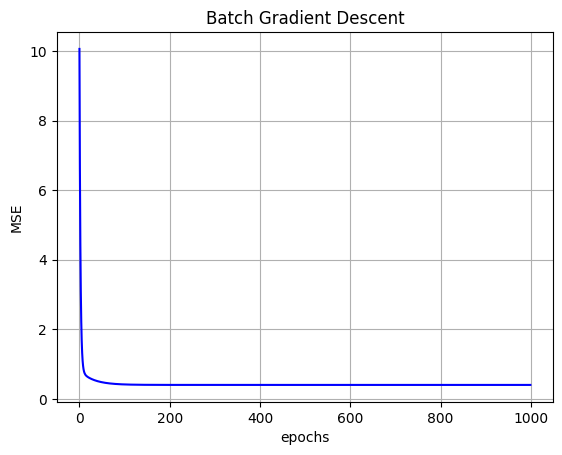

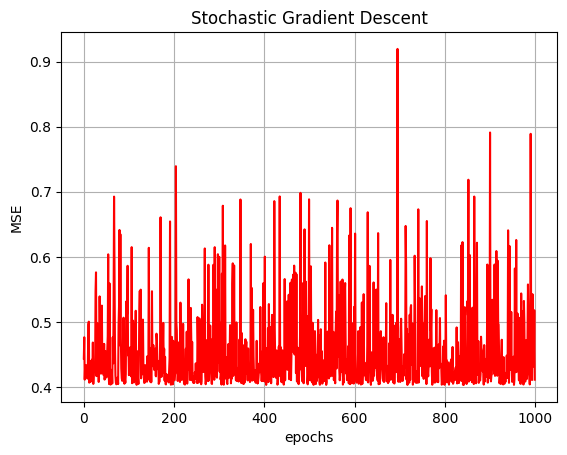

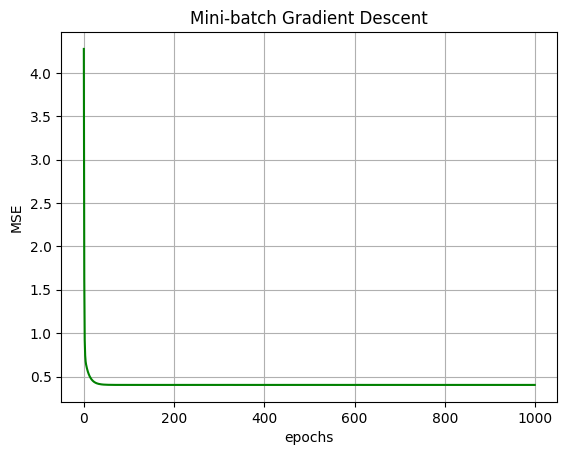

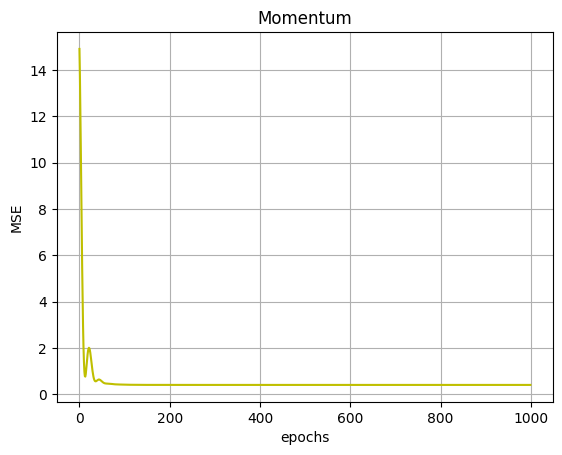

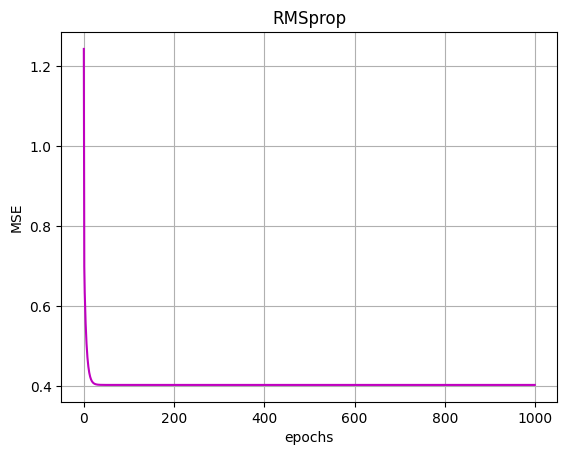

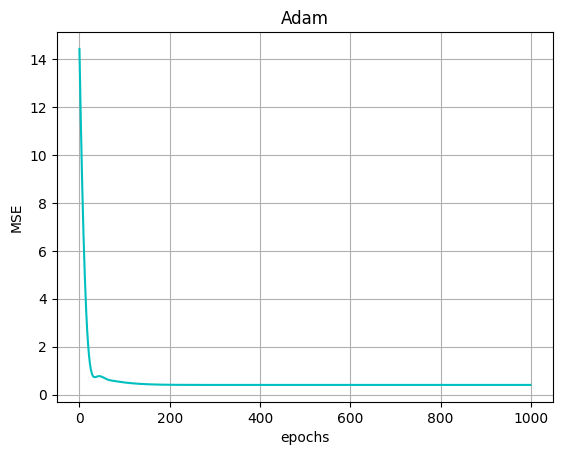

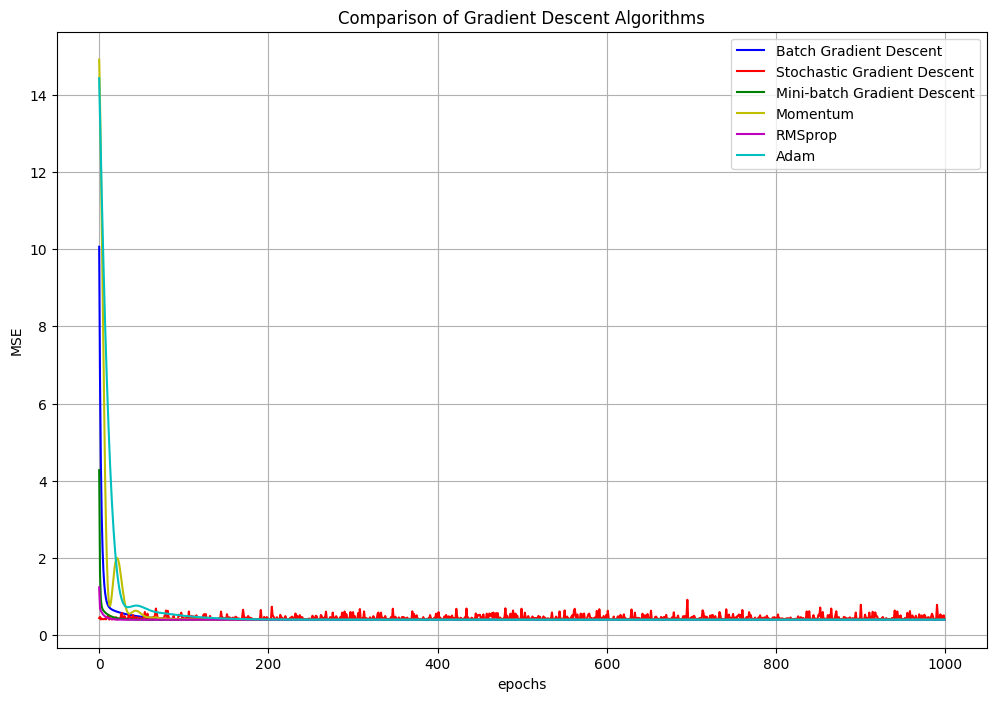

In [13]:
# Plot the convergence of each algorithm in separate figures.
plt.figure(figsize=(12, 8))

# Batch Gradient Descent
plt.figure()
plt.plot(cost_batch, color='b')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Batch Gradient Descent')
plt.grid(True)

# Stochastic Gradient Descent
plt.figure()
plt.plot(cost_sgd, color='r')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent')
plt.grid(True)

# Mini-batch Gradient Descent
plt.figure()
plt.plot(cost_mini_batch, color='g')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Mini-batch Gradient Descent')
plt.grid(True)

# Momentum
plt.figure()
plt.plot(cost_momentum, color='y')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Momentum')
plt.grid(True)

# RMSprop
plt.figure()
plt.plot(cost_rmsprop, color='m')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('RMSprop')
plt.grid(True)

# Adam
plt.figure()
plt.plot(cost_adam, color='c')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Adam')
plt.grid(True)

# Show all graphs
plt.show()


# Plot all algorithms on the same figure for comparison
plt.figure(figsize=(12, 8))

# Plot each cost function with different colors and labels
plt.plot(cost_batch, label='Batch Gradient Descent', color='b')
plt.plot(cost_sgd, label='Stochastic Gradient Descent', color='r')
plt.plot(cost_mini_batch, label='Mini-batch Gradient Descent', color='g')
plt.plot(cost_momentum, label='Momentum', color='y')
plt.plot(cost_rmsprop, label='RMSprop', color='m')
plt.plot(cost_adam, label='Adam', color='c')

# Add labels and title
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Comparison of Gradient Descent Algorithms')

# Add legend
plt.legend()

# Display grid
plt.grid(True)

# Show the plot
plt.show()

In [14]:
# Print the value of the final theta for each algorithm
print(f"The final theta parameter - Batch GD:\n{theta_batch}")
print(f"The final theta parameter - SGD:\n{theta_sgd}")
print(f"The final theta parameter - Mini-batch GD:\n{theta_mini_batch}")
print(f"The final theta parameter - Momentum:\n{theta_momentum}")
print(f"The final theta parameter - RMSprop:\n{theta_rmsprop}")
print(f"The final theta parameter - Adam:\n{theta_adam}")


The final theta parameter - Batch GD:
[[4.21509609]
 [2.77011344]]
The final theta parameter - SGD:
[[3.98009213]
 [2.96688391]]
The final theta parameter - Mini-batch GD:
[[4.21490632]
 [2.77047286]]
The final theta parameter - Momentum:
[[4.21509616]
 [2.77011339]]
The final theta parameter - RMSprop:
[[4.21509616]
 [2.77011339]]
The final theta parameter - Adam:
[[4.21509616]
 [2.77011339]]


#### Example with Wholesale customers data from UCI

<Figure size 1200x800 with 0 Axes>

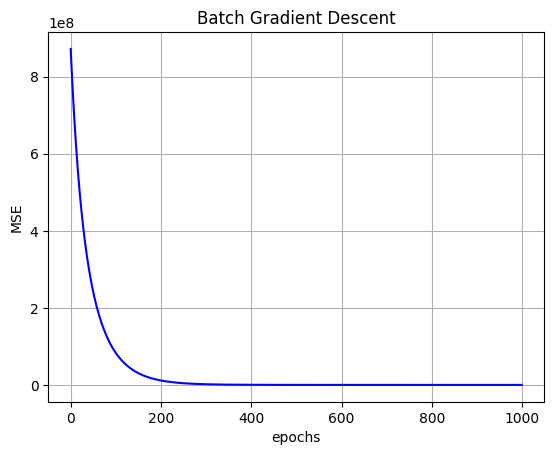

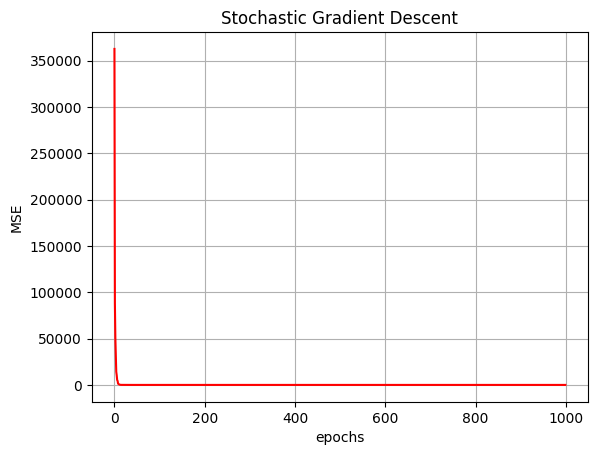

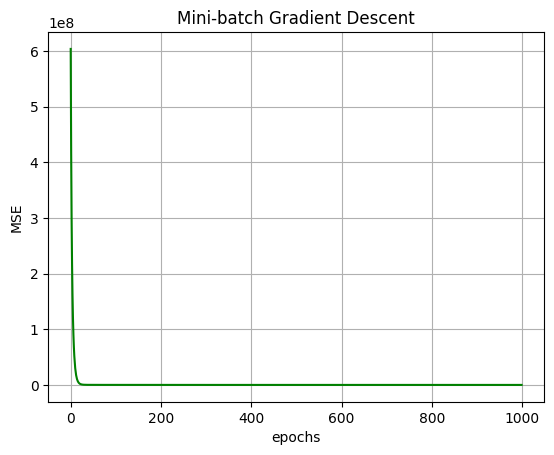

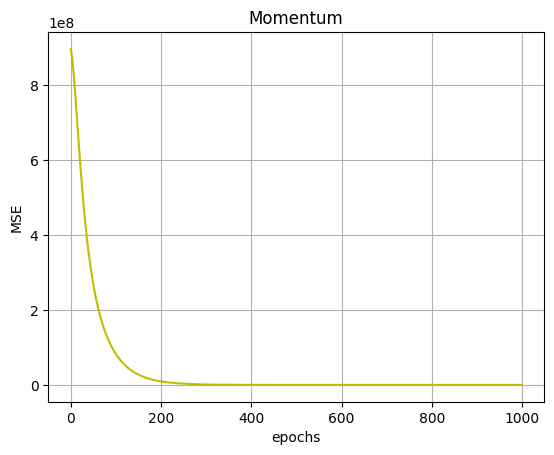

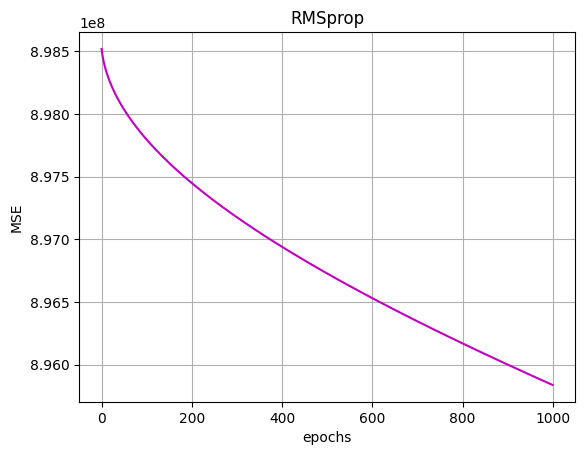

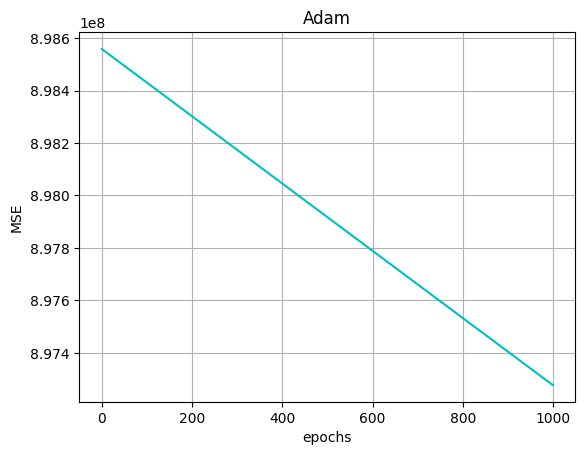

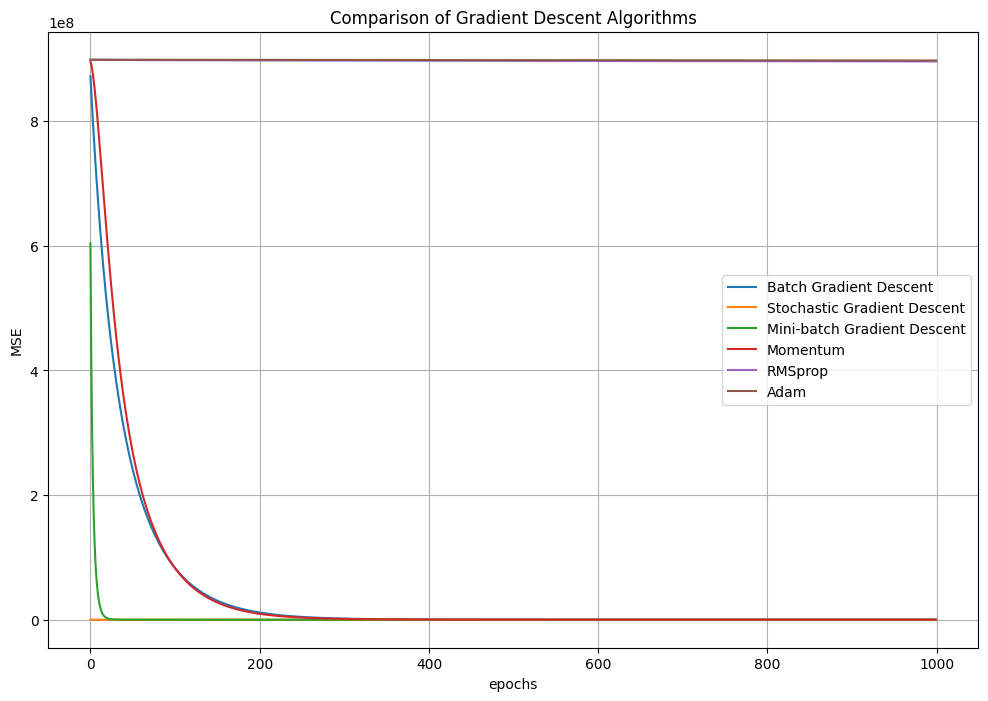

The final theta parameter - Batch GD:
[[33224.70195495]
 [12677.58711001]
 [ 7431.42031638]
 [ 8503.82793707]
 [ 4870.24590041]
 [ 5694.7428785 ]
 [ 2920.31153012]]
The final theta parameter - SGD:
[[33226.13636364]
 [12632.94872528]
 [ 7371.98561168]
 [ 9492.35763752]
 [ 4849.15352031]
 [ 4762.43334956]
 [ 2816.89944863]]
The final theta parameter - Mini-batch GD:
[[33226.13626606]
 [12632.96441599]
 [ 7372.00184273]
 [ 9492.04451256]
 [ 4849.16038213]
 [ 4762.73088078]
 [ 2816.93190998]]
The final theta parameter - Momentum:
[[33225.61800352]
 [12679.3813885 ]
 [ 7431.02963796]
 [ 8502.11119285]
 [ 4870.14980219]
 [ 5697.2351818 ]
 [ 2919.37859802]]
The final theta parameter - RMSprop:
[[21.35605545]
 [21.57470116]
 [19.51707748]
 [19.96570545]
 [21.18268238]
 [21.29297783]
 [22.46071689]]
The final theta parameter - Adam:
[[10.11680567]
 [10.33924332]
 [ 8.28385101]
 [ 8.732285  ]
 [ 9.95035341]
 [10.05962028]
 [11.22900108]]


In [15]:
# Read data from file CSV
df = pd.read_csv('Wholesale customers data.csv')

# Use the columns Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen as independent variables (X)
X = df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].values

# Suppose the target value (y) is the sum of the columns
y = df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].sum(axis=1).values.reshape(-1, 1)

# Standardize X so that each column has a standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add column 1 for bias term (X0 = 1)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Initialize random parameter (theta)
theta_init = np.random.randn(7, 1)

# Algorithm parameters
alpha = 0.01
iterations = 1000
batch_size = 32
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Applying algorithms
theta_batch, cost_batch = batch_gradient_descent(X_b, y, theta_init, alpha, iterations)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_b, y, theta_init, alpha, iterations)
theta_mini_batch, cost_mini_batch = mini_batch_gradient_descent(X_b, y, theta_init, alpha, iterations, batch_size)
theta_momentum, cost_momentum = momentum_gradient_descent(X_b, y, theta_init, alpha, beta1, iterations)
theta_rmsprop, cost_rmsprop = rmsprop_gradient_descent(X_b, y, theta_init, alpha, beta2, epsilon, iterations)
theta_adam, cost_adam = adam_gradient_descent(X_b, y, theta_init, alpha, beta1, beta2, epsilon, iterations)


# Plot the convergence of each algorithm in separate figures.
plt.figure(figsize=(12, 8))

# Batch Gradient Descent
plt.figure()
plt.plot(cost_batch, color='b')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Batch Gradient Descent')
plt.grid(True)

# Stochastic Gradient Descent
plt.figure()
plt.plot(cost_sgd, color='r')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent')
plt.grid(True)

# Mini-batch Gradient Descent
plt.figure()
plt.plot(cost_mini_batch, color='g')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Mini-batch Gradient Descent')
plt.grid(True)

# Momentum
plt.figure()
plt.plot(cost_momentum, color='y')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Momentum')
plt.grid(True)

# RMSprop
plt.figure()
plt.plot(cost_rmsprop, color='m')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('RMSprop')
plt.grid(True)

# Adam
plt.figure()
plt.plot(cost_adam, color='c')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Adam')
plt.grid(True)
plt.show()

# Draw a graph showing the convergence process of the algorithms.
plt.figure(figsize=(12, 8))
plt.plot(cost_batch, label='Batch Gradient Descent')
plt.plot(cost_sgd, label='Stochastic Gradient Descent')
plt.plot(cost_mini_batch, label='Mini-batch Gradient Descent')
plt.plot(cost_momentum, label='Momentum')
plt.plot(cost_rmsprop, label='RMSprop')
plt.plot(cost_adam, label='Adam')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.title('Comparison of Gradient Descent Algorithms')
plt.legend()
plt.grid(True)
plt.show()

# Print the value of the final theta for each algorithm
print(f"The final theta parameter - Batch GD:\n{theta_batch}")
print(f"The final theta parameter - SGD:\n{theta_sgd}")
print(f"The final theta parameter - Mini-batch GD:\n{theta_mini_batch}")
print(f"The final theta parameter - Momentum:\n{theta_momentum}")
print(f"The final theta parameter - RMSprop:\n{theta_rmsprop}")
print(f"The final theta parameter - Adam:\n{theta_adam}")


## House price prediction problem


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('Housing.csv')

# Convert categorical variable to numeric
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# One-hot encoding for 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Separate features (X) and target (y)
X = data.drop('price', axis=1).values
y = data['price'].values.reshape(-1, 1)

# Data Normalization
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameter (theta)
theta_initial = np.zeros((X_train.shape[1], 1)) # Initialize theta to the appropriate size

# List of algorithms
algorithms = {
    "Batch GD": batch_gradient_descent,
    "SGD": stochastic_gradient_descent,
    "Mini-batch GD": mini_batch_gradient_descent,
    "Momentum": momentum_gradient_descent,
    "RMSprop": rmsprop_gradient_descent,
    "Adam": adam_gradient_descent
}

# Train and print details for each algorithm
print("Detailed results for each algorithm:")
for name, algo in algorithms.items():
    if name == "Mini-batch GD":
        theta, cost_history = algo(X_train, y_train, theta_initial, alpha=0.01, iterations=1000, batch_size=32)
    elif name == "Momentum":
        theta, cost_history = algo(X_train, y_train, theta_initial, alpha=0.01, beta=0.9, iterations=1000)
    elif name == "RMSprop":
        theta, cost_history = algo(X_train, y_train, theta_initial, alpha=0.01, beta=0.9, epsilon=1e-8, iterations=1000)
    elif name == "Adam":
        theta, cost_history = algo(X_train, y_train, theta_initial, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=1000)
    else:
        theta, cost_history = algo(X_train, y_train, theta_initial, alpha=0.01, iterations=1000)

    # Predict values ​​from standardized samples
    sample = np.array([[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 1, 0]])  # 13 columns after encoding
    sample_scaled = scaler_X.transform(sample)
    pred_scaled = X.dot(theta)
    pred_price = scaler_y.inverse_transform(pred_scaled)

    print(f"\n[{name}]:")
    print(f"  Estimated house price: {pred_price[0][0]}")
    print(f"  MSE value: {compute_cost(X_test, y_test, theta)}")
    print("--------------------------------------")


Detailed results for each algorithm:

[Batch GD]:
  Estimated house price: 7173661.551936084
  MSE value: 0.0077695806810960015
--------------------------------------

[SGD]:
  Estimated house price: 8012350.585211709
  MSE value: 0.006390893169671243
--------------------------------------

[Mini-batch GD]:
  Estimated house price: 7938539.676205082
  MSE value: 0.006399961668892404
--------------------------------------

[Momentum]:
  Estimated house price: 7175833.663559767
  MSE value: 0.007769195688054719
--------------------------------------

[RMSprop]:
  Estimated house price: 7616073.7905556355
  MSE value: 0.00713475625395747
--------------------------------------

[Adam]:
  Estimated house price: 7943124.826047742
  MSE value: 0.0064154659804134435
--------------------------------------


# Question 2


## Import data

In [17]:
import pandas as pd

file_name = 'online_shoppers_intention.csv'
df = pd.read_csv(file_name)

print("Data Information:")
df.info()

print("\nData Content (First 5 Rows):")
print(df.head())

# Statistical description for numerical columns in the data
print("\nStatistical Description of the Data:")
print(df.describe())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Traf

## Perform data cleaning and visualization steps to better understand the data.

### Data cleaning

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# Check data information
print("Data Information:")
df.info()

# Check for missing values
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Replace missing values (if any) with the mean value (or another method)
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(df['ProductRelated_Duration'].mean())

# Check the number of missing values after replacement
print("\nNumber of missing values after replacement:")
print(df.isnull().sum())

# Check and remove outliers
df = df[df['ProductRelated_Duration'] < 1000]

# Check the data after cleaning
print("\nData content after cleaning:")
print(df.head())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Traf

### Data visualization

<Figure size 1500x1000 with 0 Axes>

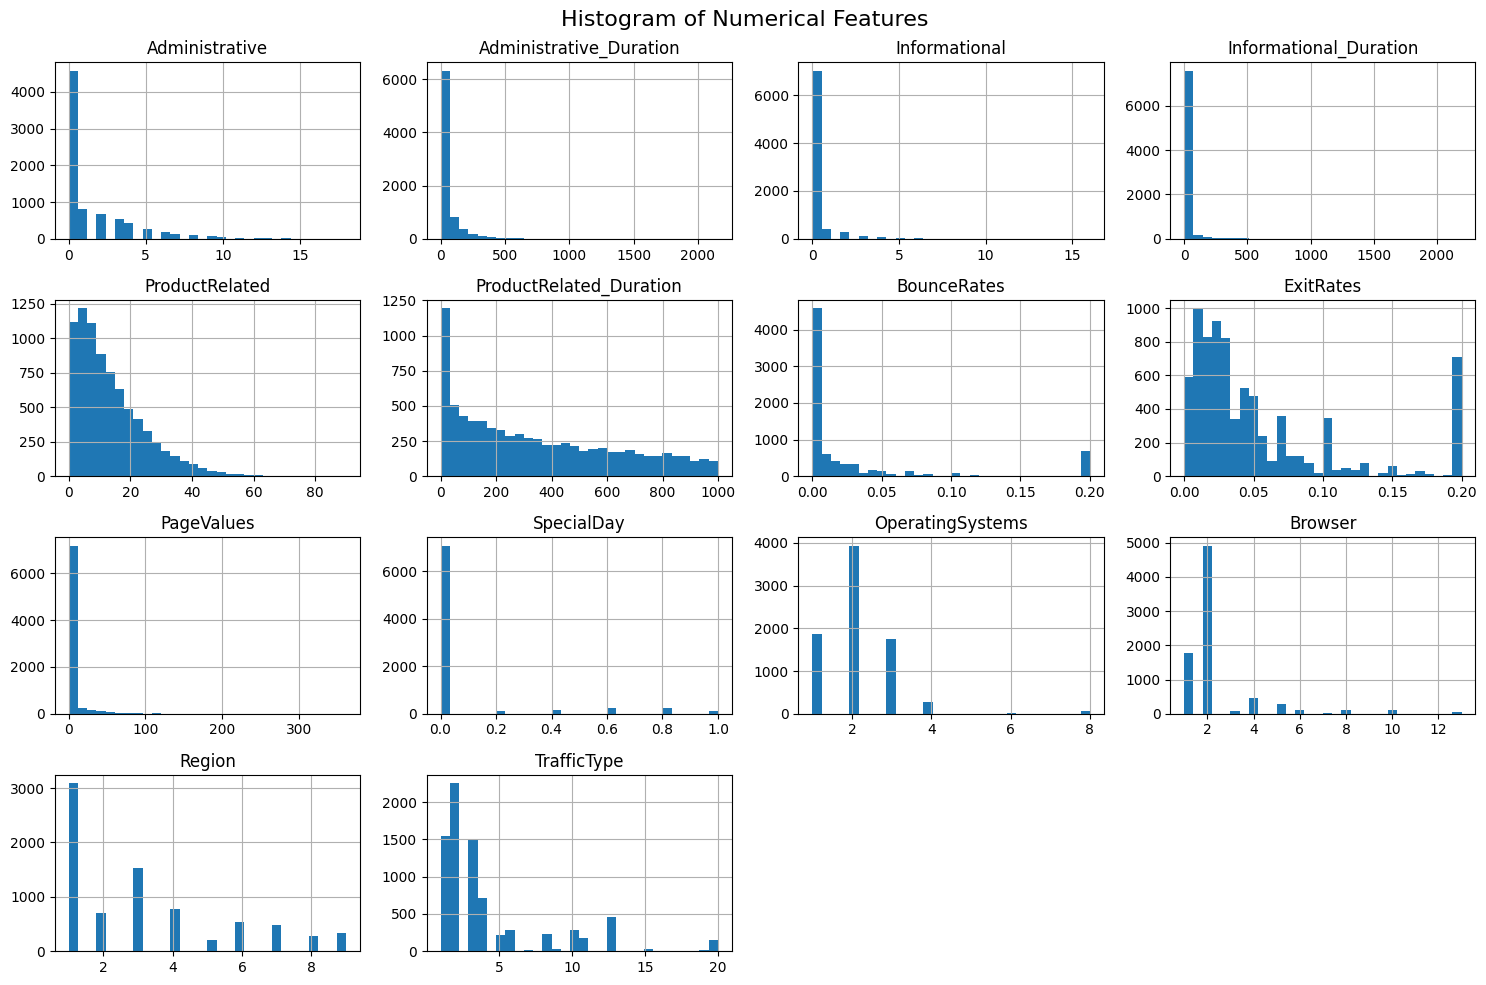

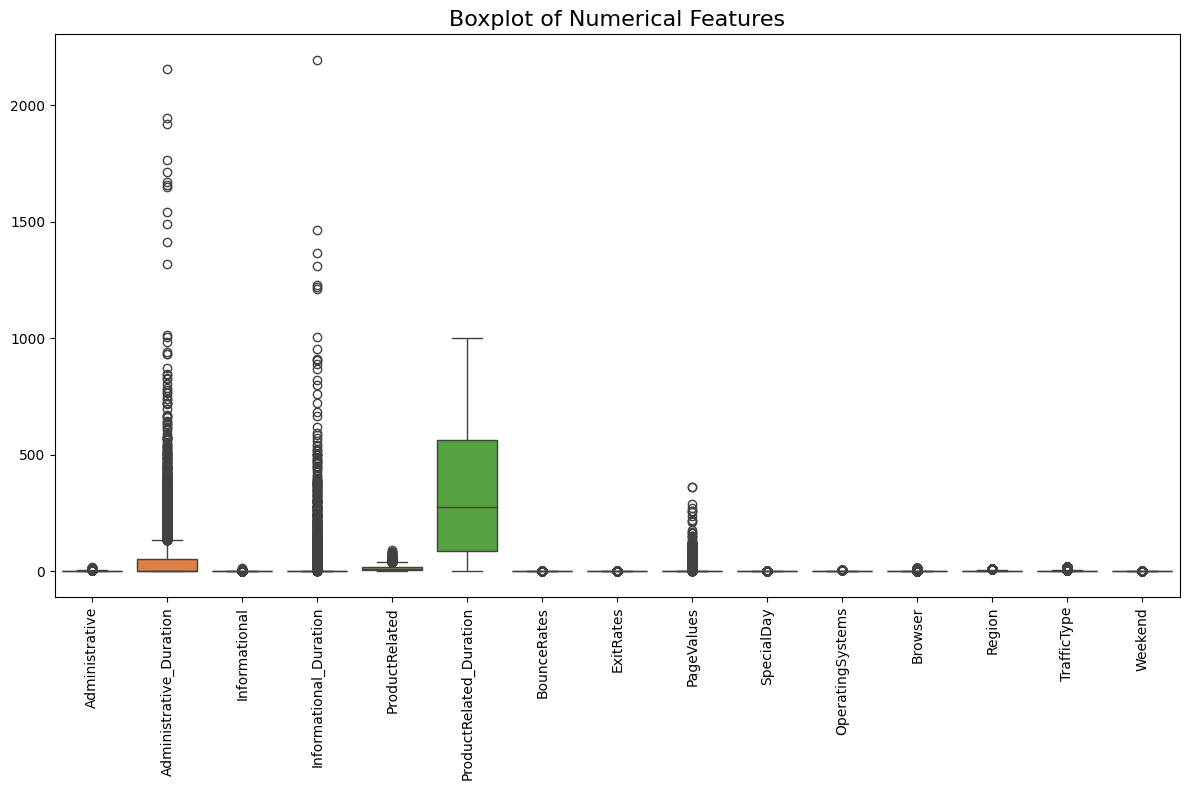

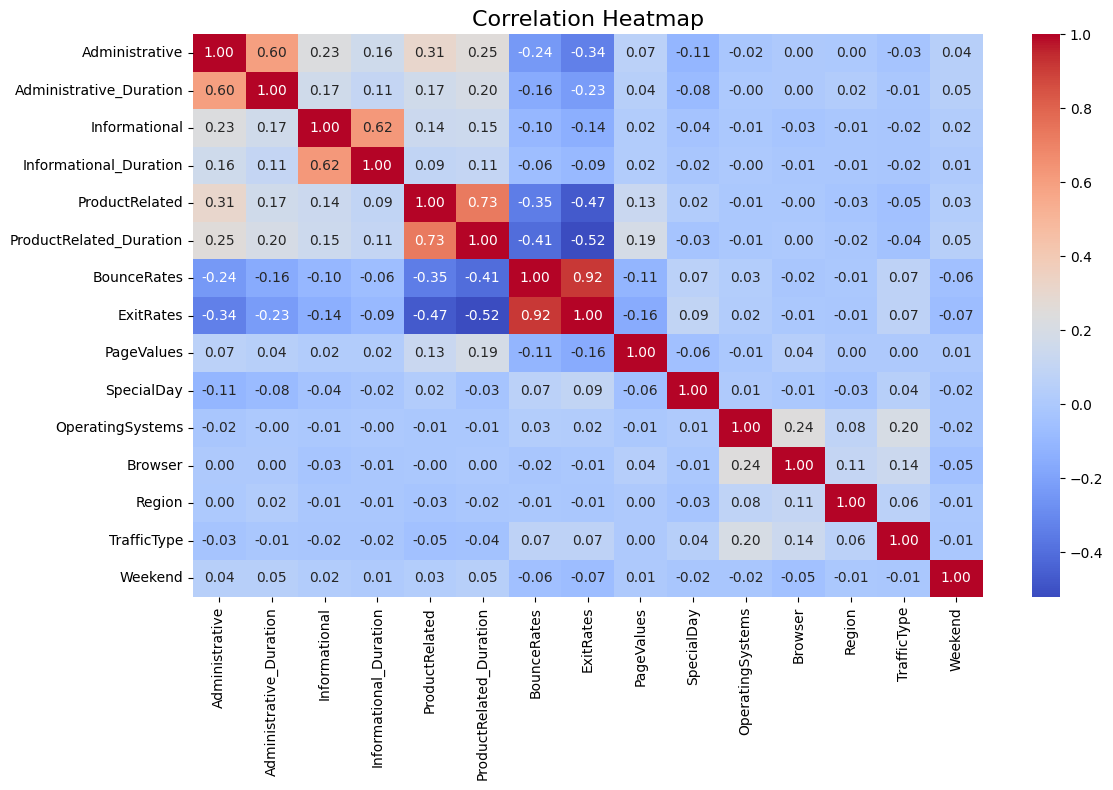

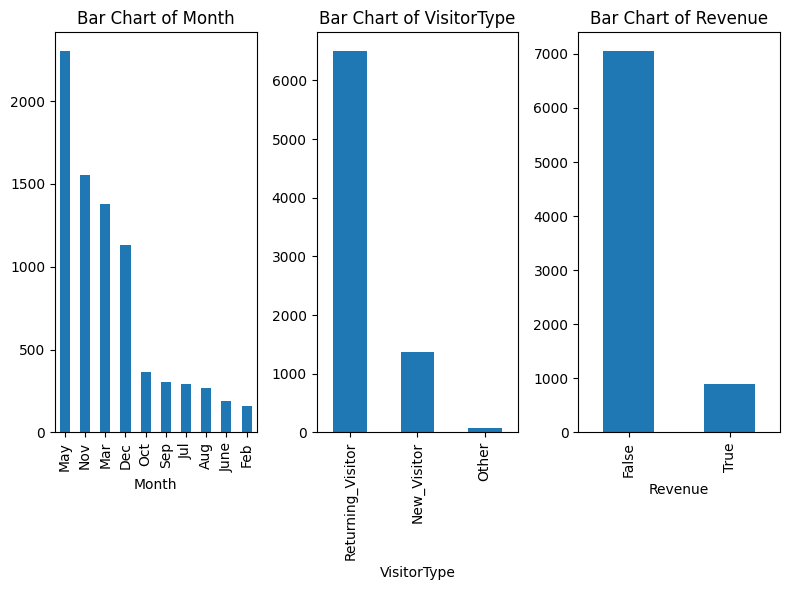

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns in the data (excluding categorical columns)
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Plot histograms to see the distribution of data with labels for the x and y axes
plt.figure(figsize=(15, 10))
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.xlabel('Feature Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()
print()

# Plot boxplot to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Features", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print()

# Plot correlation heatmap to check the relationship between variables
numerical_cols_no_categoricals = [col for col in numerical_cols if df[col].dtype != 'object']
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols_no_categoricals].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()
print()

# Plot bar charts for categorical variables
plt.figure(figsize=(12, 8))
categorical_cols = ['Month', 'VisitorType', 'Revenue']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    df[col].value_counts().plot(kind='bar', title=f"Bar Chart of {col}", figsize=(8, 6))
    plt.tight_layout()
plt.show()


## Perform steps to convert data and normalize data; divide into Train set and Test set

### Convert data

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Convert categorical columns to numbers (Label Encoding or One-Hot Encoding)
categorical_cols = ['Month', 'VisitorType', 'Revenue']  # Example categorical columns
label_encoders = {}

# Apply LabelEncoder for categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical values to numbers
    label_encoders[col] = le

# Check the data again
print("\nData content after Label Encoding:")
print(df.head())

# Check and remove outliers (if needed)
# Example: Remove rows with values in 'ProductRelated_Duration' that are too large or unreasonable
df = df[df['ProductRelated_Duration'] < 1000]



Data content after Label Encoding:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00      

### Normalize data

In [21]:
# Normalize the data for numerical features
scaler = StandardScaler()
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                  'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Convert numerical columns to float64
df[numerical_cols] = df[numerical_cols].astype('float64')

# Normalize the numerical columns
scaler = StandardScaler()
df.loc[:, numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the data after normalization
print("\nData content after normalization:")
print(df.head())



Data content after normalization:
   Administrative  Administrative_Duration  Informational  \
0       -0.612946                -0.414437      -0.292007   
1       -0.612946                -0.414437      -0.292007   
2       -0.612946                -0.414437      -0.292007   
3       -0.612946                -0.414437      -0.292007   
4       -0.612946                -0.414437      -0.292007   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.176649       -1.075741                -1.194591   
1               -0.176649       -0.987630                -0.972346   
2               -0.176649       -1.075741                -1.194591   
3               -0.176649       -0.987630                -1.185331   
4               -0.176649       -0.282738                 0.984455   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     2.914711   2.595619   -0.251603   -0.323145 -1.304139         -1.159902   
1    -0.513759 

### Split into Train set and Test set

In [22]:
# Split the dataset into X (features) and y (target values)
X = df.drop('Revenue', axis=1) # Features (remove 'Revenue' column as this is the target column)
y = df['Revenue'] # Target value column (Revenue)

# Split the training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and test sets
print(f"\nSize of the training set: {X_train.shape}")
print(f"Size of the test set: {X_test.shape}")


Size of the training set: (6350, 17)
Size of the test set: (1588, 17)


## Implement different Machine Learning algorithms

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### 1 - KNN

In [24]:
# 1. KNN (K-Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

### 2 - Logistic Regression

In [25]:
# 2. Logistic Regression
log_reg = LogisticRegression(C=100)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

### 3 - SVM

In [26]:
# 3. SVM (Support Vector Machine)
svm = SVC(C = 100)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

### 4 - K-Means Clustering

In [27]:
# 4. K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)
kmeans_inertia = kmeans.inertia_

### 5 - Decision Tree

In [28]:
# 5. Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

## Evaluate results through Test set, compare methods

KNN Accuracy: 91.06%
Logistic Regression Accuracy: 93.01%
SVM Accuracy: 91.75%
Decision Tree Accuracy: 90.93%

Metrics for each model:
KNN - Precision: 0.86, Recall: 0.30, F1-Score: 0.45
Logistic Regression - Precision: 0.86, Recall: 0.49, F1-Score: 0.63
SVM - Precision: 0.69, Recall: 0.57, F1-Score: 0.62
Decision Tree - Precision: 0.62, Recall: 0.62, F1-Score: 0.62
K-Means Inertia: 96113.14


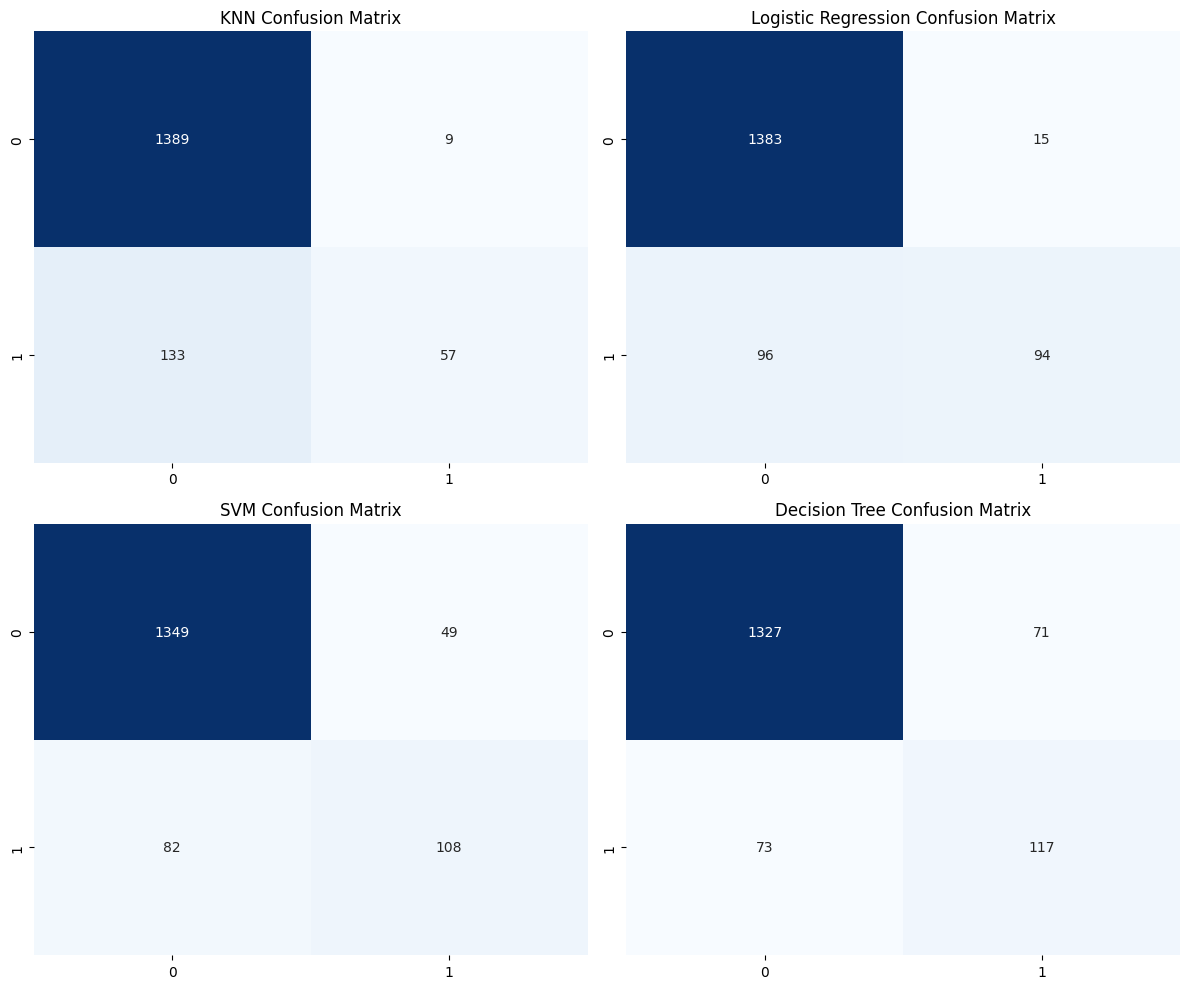

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Accuracy for classification models
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

# Calculate other metrics: Precision, Recall, F1-Score for classification models
print("\nMetrics for each model:")
# KNN
print(f"KNN - Precision: {precision_score(y_test, y_pred_knn):.2f}, Recall: {recall_score(y_test, y_pred_knn):.2f}, F1-Score: {f1_score(y_test, y_pred_knn):.2f}")
# Logistic Regression
print(f"Logistic Regression - Precision: {precision_score(y_test, y_pred_log_reg):.2f}, Recall: {recall_score(y_test, y_pred_log_reg):.2f}, F1-Score: {f1_score(y_test, y_pred_log_reg):.2f}")
#SVM
print(f"SVM - Precision: {precision_score(y_test, y_pred_svm):.2f}, Recall: {recall_score(y_test, y_pred_svm):.2f}, F1-Score: {f1_score(y_test, y_pred_svm):.2f}")
# Decision Tree
print(f"Decision Tree - Precision: {precision_score(y_test, y_pred_dt):.2f}, Recall: {recall_score(y_test, y_pred_dt):.2f}, F1-Score: {f1_score(y_test, y_pred_dt):.2f}")

# Inertia for K-Means Clustering (Note: K-Means is unsupervised)
print(f"K-Means Inertia: {kmeans.inertia_:.2f}")

# Draw the Confusion Matrix for each classification model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Draw the confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('KNN Confusion Matrix')
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('SVM Confusion Matrix')
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()

### Apply Overfitting

#### KNN

In [30]:
# KNN (K-Nearest Neighbors)
knn_overfit = KNeighborsClassifier(n_neighbors=5)
knn_overfit.fit(X_train, y_train)
y_pred_knn_overfit = knn_overfit.predict(X_test)
knn_overfit_accuracy = accuracy_score(y_test, y_pred_knn_overfit)

# Print results
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print(f"KNN Accuracy after application avoids overfitting : {knn_overfit_accuracy * 100:.2f}%")

KNN Accuracy: 91.06%
KNN Accuracy after application avoids overfitting : 91.62%


#### Logistic Regression

In [31]:
# Logistic Regression
log_reg_overfit = LogisticRegression(C=10)
log_reg_overfit.fit(X_train, y_train)
y_test_pred_overfit = log_reg_overfit.predict(X_test)
log_reg_overfit_accuracy = accuracy_score(y_test, y_test_pred_overfit)

# Print results
print(f"Logistic Regression Accuracy : {log_reg_accuracy * 100:.2f}%")
print(f"KNN Accuracy after application avoids overfitting: {log_reg_overfit_accuracy * 100:.2f}%")

Logistic Regression Accuracy : 93.01%
KNN Accuracy after application avoids overfitting: 93.01%


#### SVM

In [32]:
# SVM (Support Vector Machine)
svm_overfit = SVC(C=10)
svm_overfit.fit(X_train, y_train)

y_test_pred_svm = svm_overfit.predict(X_test)

svm_overfit_accuracy = accuracy_score(y_test, y_test_pred_svm)

# Print results
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"SVM Accuracy after application avoids overfitting:  {svm_overfit_accuracy * 100:.2f}%")

SVM Accuracy: 91.75%
SVM Accuracy after application avoids overfitting:  93.26%


#### K-Means

In [33]:
# K-Means Clustering
kmeans_overfit = KMeans(n_clusters=5)
kmeans_overfit.fit(X_train)
y_pred_kmeans = kmeans_overfit.predict(X_test)
kmeans_overfit_inertia = kmeans_overfit.inertia_

# Print results
print(f"K-Means Inertia: {kmeans_inertia:.2f}")
print(f"K-Means Inertia after application avoids overfitting: {kmeans_overfit_inertia:.2f}")

K-Means Inertia: 96113.14
K-Means Inertia after application avoids overfitting: 78625.25


#### Decision Tree

In [34]:
# 5. Decision Tree
decision_tree_overfit = DecisionTreeClassifier(max_depth=1)
decision_tree_overfit.fit(X_train, y_train)
y_pred_decision_tree_overfit = decision_tree_overfit.predict(X_test)
dt_overfit_accuracy = accuracy_score(y_test, y_pred_decision_tree_overfit)

# Print results
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Decision Tree Accuracy after application avoids overfitting: {dt_overfit_accuracy * 100:.2f}%")

Decision Tree Accuracy: 90.93%
Decision Tree Accuracy after application avoids overfitting: 94.71%
